# Introduction

**Car Price Prediction with Machine Learning**

In this project, we aim to predict the selling price of used cars based on various features such as year, driven kilometers, fuel type, transmission type, and more. By leveraging machine learning, we can help buyers and sellers estimate a car's value accurately.

**Objectives:**

* Understand the dataset and perform exploratory data analysis.

* Preprocess the data, handling missing values and encoding categorical features.

* Train machine learning models to predict car prices.

* Evaluate the model's performance using suitable metrics.


# Import Libraries & Load the Dataset

Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

Load the Dataset

In [47]:
# Load the dataset
dataset = pd.read_csv('car data.csv')

# Display the first few rows
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis (EDA)

In [48]:
# Display basic information about the dataset
dataset.info()

# Check for missing values
dataset.isnull().sum()

# Display summary statistics
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Preprocessing

In [49]:
# Handle Categorical Data (One-hot encoding)
# Encoding categorical variables 'Fuel_Type', 'Selling_type', 'Transmission' into numeric form
dataset = pd.get_dummies(dataset, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Feature Selection (Dropping unnecessary columns)
# Removing 'Car_Name' as it is not relevant for model prediction
dataset.drop(columns=['Car_Name'], inplace=True)

# Feature Scaling (Standardization)
# Scaling numerical columns ('Year', 'Present_Price', 'Driven_kms') using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['Year', 'Present_Price', 'Driven_kms']] = scaler.fit_transform(dataset[['Year', 'Present_Price', 'Driven_kms']])

# Displaying the preprocessed dataset
dataset.head()


,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,0.128897,3.35,-0.236256,-0.256224,0,False,True,False,True
1,-0.217514,4.75,0.221544,0.155911,0,True,False,False,True
2,1.168129,7.25,0.257472,-0.773969,0,False,True,False,True
3,-0.910335,2.85,-0.403151,-0.817758,0,False,True,False,True
4,0.128897,4.60,-0.087906,0.141743,0,True,False,False,True


# Model Building

In [50]:
# Split the data into features (X) and target (y)
X = dataset.drop(columns=['Selling_Price'])
y = dataset['Selling_Price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

# Output the results
print(f"Random Forest R²: {rf_r2}")
print(f"Random Forest Mean Absolute Error: {rf_mae}")


Random Forest R²: 0.964267348492529
Random Forest Mean Absolute Error: 0.5971131147540986


# Model Evaluation and Visualization

Feature Importance Plot:


<ipython-input-53-0bae68081083>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


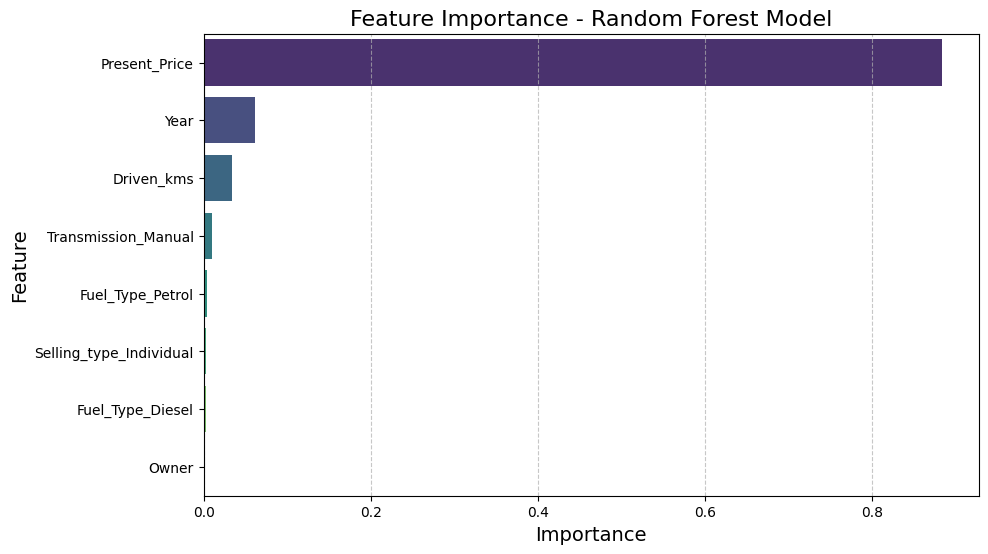

In [53]:
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

Actual vs Predicted Prices:

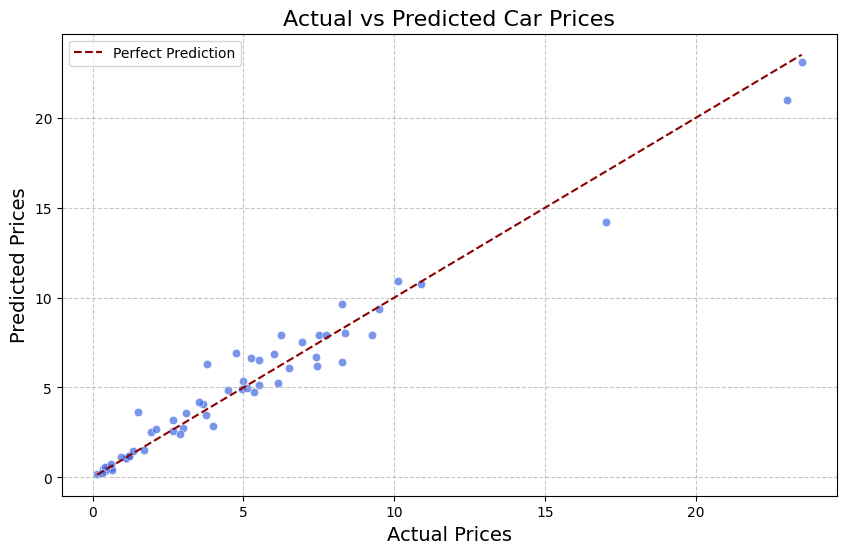

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_y_pred, color='royalblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkred', linestyle='--', label="Perfect Prediction")
plt.title('Actual vs Predicted Car Prices', fontsize=16)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Residual Plot:

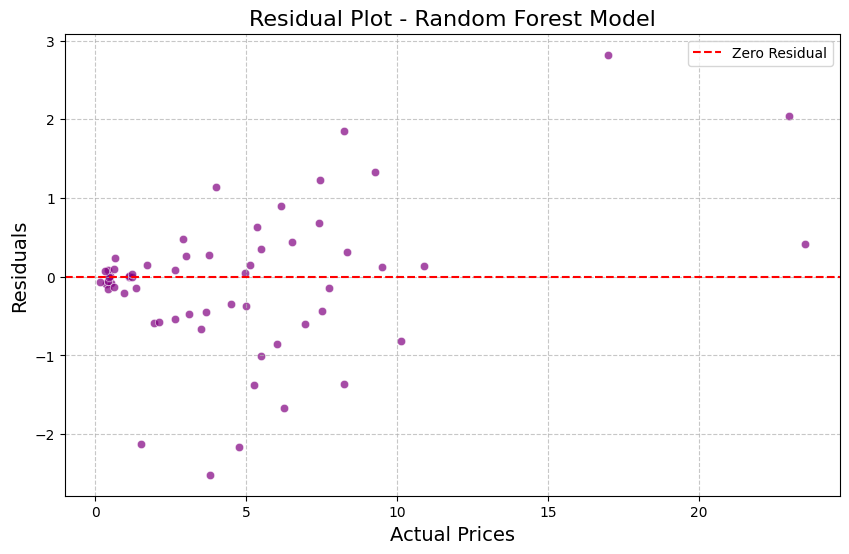

In [55]:
residuals = y_test - rf_y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', label="Zero Residual")
plt.title('Residual Plot - Random Forest Model', fontsize=16)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Distribution of Prediction Errors:

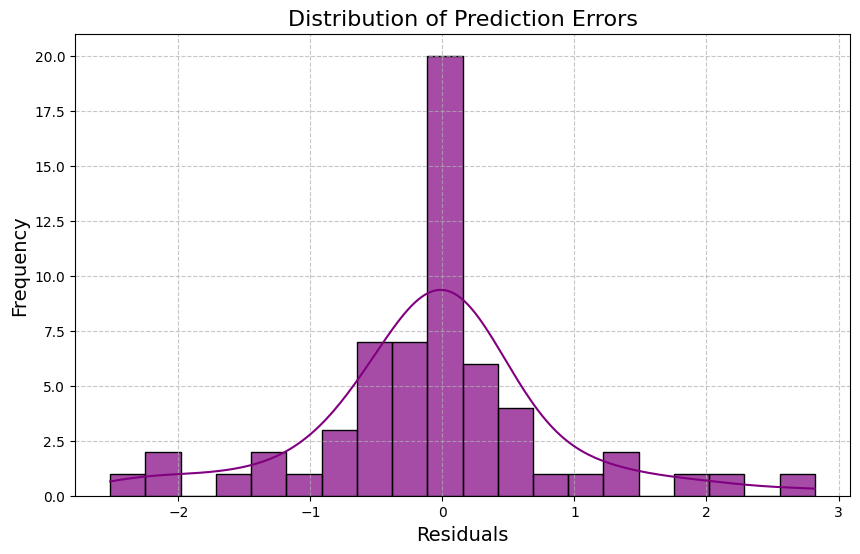

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20, alpha=0.7)
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Conclusion:**

The Random Forest model demonstrated a strong performance with an R² value of 0.96 and a Mean Absolute Error of 0.60, indicating its effectiveness in predicting car prices. The feature importance analysis revealed that factors such as 'Present_Price' and 'Driven_kms' played a significant role in determining the price. Residual analysis further confirmed that the model is well-suited for the task, as the residuals were spread evenly around zero.

While the model shows promising results, it can still be improved by fine-tuning hyperparameters or considering additional features like car brand and condition.

This model could be a valuable tool for predicting car prices in real-world applications, assisting car buyers, sellers, and dealerships in making data-driven decisions.